In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot
from sklearn.datasets import fetch_california_housing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
!pip install pandas-profiling
from ydata_profiling import ProfileReport


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8571130267f4d32d722b5f06bb61bf50261cb24b6b11c8abdf4fb26e00c2d05b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
df = pd.read_csv('/content/5G_energy_consumption_dataset.csv.crdownload')

In [4]:
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
33542,20230103 030000,B_305,13.452915,0.016240,0.0,6.427504
33543,20230103 040000,B_305,13.452915,0.016120,0.0,6.427504
33544,20230103 050000,B_305,13.452915,0.016020,0.0,6.427504
33545,20230103 060000,B_305,13.452915,0.016140,0.0,6.427504


In [5]:
profile = ProfileReport(df, title= 'My Report')
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33547 entries, 0 to 33546
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     33547 non-null  object 
 1   BS       33547 non-null  object 
 2   Energy   33547 non-null  float64
 3   load     33547 non-null  float64
 4   ESMODE   33547 non-null  float64
 5   TXpower  33547 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [8]:
df.Time= pd.to_datetime(df.Time)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33547 entries, 0 to 33546
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     33547 non-null  datetime64[ns]
 1   BS       33547 non-null  object        
 2   Energy   33547 non-null  float64       
 3   load     33547 non-null  float64       
 4   ESMODE   33547 non-null  float64       
 5   TXpower  33547 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.5+ MB


In [10]:
df.describe()

,Time,Energy,load,ESMODE,TXpower
count,33547,33547.000000,33547.000000,33547.000000,33547.000000
mean,2023-01-04 01:03:02.967180288,29.193542,0.256524,0.077698,6.750975
min,2023-01-01 01:00:00,5.082212,0.007820,0.000000,5.680120
25%,2023-01-02 11:00:00,18.983558,0.067220,0.000000,6.427504
50%,2023-01-03 21:00:00,25.261584,0.187783,0.000000,6.875934
75%,2023-01-05 15:00:00,36.771300,0.379878,0.000000,6.875934
max,2023-01-07 23:00:00,96.263079,0.988074,2.000000,7.101719
std,NaN,14.071365,0.232879,0.375911,0.286495


In [11]:
df.duplicated().sum()

0

<Axes: >

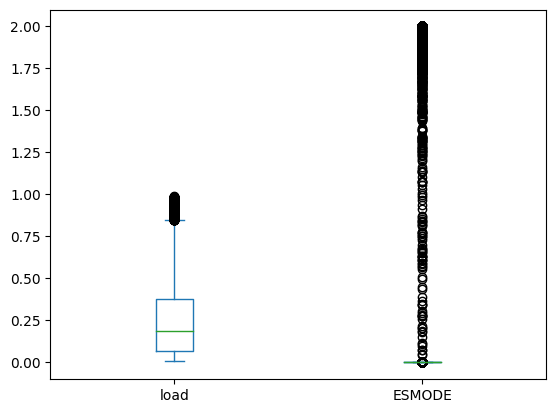

In [12]:
df[['load', 'ESMODE']].plot(kind="box")

<Axes: >

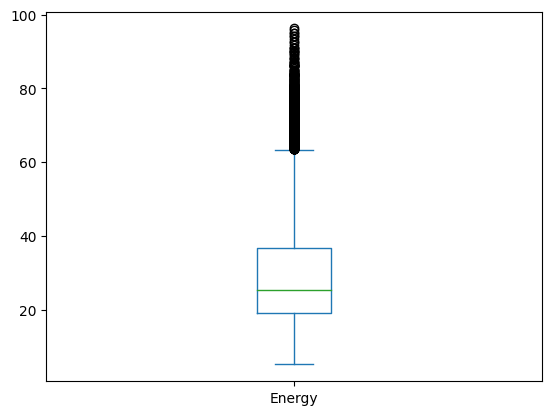

In [13]:
df['Energy'].plot(kind="box")

In [14]:
df[['Energy', 'load', 'ESMODE']]

,Energy,load,ESMODE
0,64.275037,0.487936,0.0
1,55.904335,0.344468,0.0
2,57.698057,0.193766,0.0
3,55.156951,0.222383,0.0
4,56.053812,0.175436,0.0
...,...,...,...
33542,13.452915,0.016240,0.0
33543,13.452915,0.016120,0.0
33544,13.452915,0.016020,0.0
33545,13.452915,0.016140,0.0


In [15]:
def outlierss(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

In [16]:
outlierss(df,'Energy')
outlierss(df,'load')
outlierss(df,'ESMODE')

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
33542,2023-01-03 03:00:00,B_305,13.452915,0.016240,0.0,6.427504
33543,2023-01-03 04:00:00,B_305,13.452915,0.016120,0.0,6.427504
33544,2023-01-03 05:00:00,B_305,13.452915,0.016020,0.0,6.427504
33545,2023-01-03 06:00:00,B_305,13.452915,0.016140,0.0,6.427504


In [17]:
df2=df.select_dtypes(np.number)

In [18]:
df2.corr()['Energy']

,Energy
Energy,1.000000
load,0.621498
ESMODE,-0.279200
TXpower,0.510617


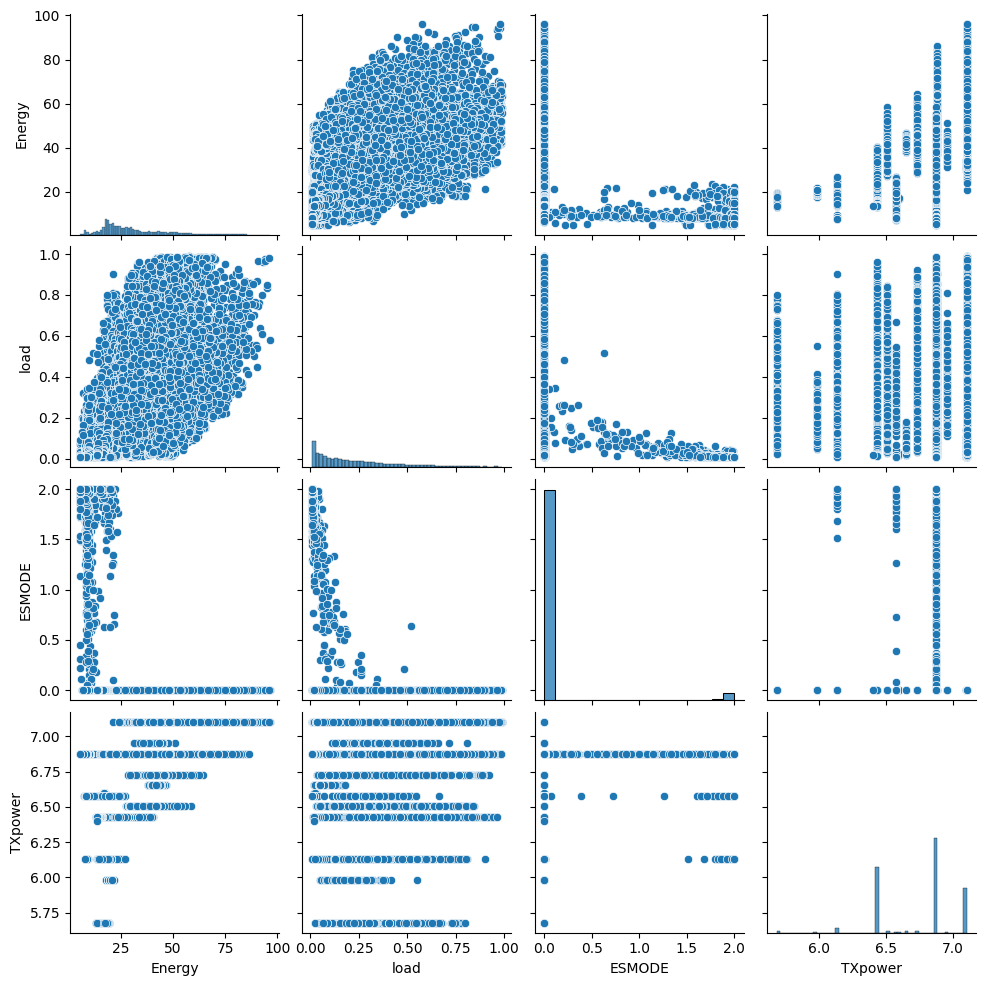

In [19]:
sns.pairplot(df)

In [20]:
x = df2.drop('Energy', axis=1)
y = df2['Energy']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scale = MinMaxScaler()
x_trainScaled = scale.fit_transform(x_train)
x_testScaled = scale.transform(x_test)

In [23]:
lr = LinearRegression()
lr.fit(x_trainScaled, y_train)

LinearRegression()

In [24]:
prediction = (lr.predict(x_testScaled))

In [25]:
r2_score(y_test, prediction)

0.5757744755363259

In [26]:
mean_squared_error(y_test, prediction)

82.996128377217

In [27]:
mean_absolute_error(y_test, prediction)

6.864186924367971

#polynomialRegression

In [28]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [29]:
lr.fit(x_train_poly, y_train)

LinearRegression()

In [30]:
pred = lr.predict(x_test_poly)
trainpred = lr.predict(x_train_poly)

In [31]:
r2_score(y_test, pred)

0.6485476245827755

In [32]:
mean_squared_error(y_test, pred)

68.75867854835677

In [33]:
mean_squared_error(y_train, trainpred)

71.01900970165111

In [34]:
mean_absolute_error(y_test, pred)

6.0184959224859105

In [35]:
mean_absolute_error(y_train, trainpred)

6.08932796932718

#Lasso

In [36]:
from sklearn.linear_model import Lasso

In [37]:
ls= Lasso()
ls.fit(x_trainScaled, y_train)

Lasso()

In [38]:
predict = ls.predict(x_testScaled)

In [39]:
r2_score(y_test, predict)

0.36387663754502986

In [40]:
mean_squared_error(y_test, predict)

124.45214445973414

In [41]:
mean_absolute_error(y_test, predict)

8.578016525291412

#Ridge

In [42]:
from sklearn.linear_model import Ridge

In [43]:
rd= Ridge()
rd.fit(x_trainScaled, y_train)

Ridge()

In [44]:
predict = rd.predict(x_testScaled)

In [45]:
r2_score(y_test, predict)

0.5757751060815074

In [46]:
mean_squared_error(y_test, predict)

82.99600501639637

In [47]:
mean_absolute_error(y_test, predict)

6.863514385134174

#DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
x = df2.drop('Energy', axis =1 )
y= df2['Energy']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
dt = DecisionTreeRegressor(max_depth= 2)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [52]:
predict = dt.predict(x_test)

In [53]:
r2_score(y_test, predict)

0.7001641227548754

In [54]:
mean_absolute_error(y_test, predict)

5.806761126983937

In [55]:
mean_squared_error(y_test, predict)

58.6603481518301

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
rmse

7.659004383849777

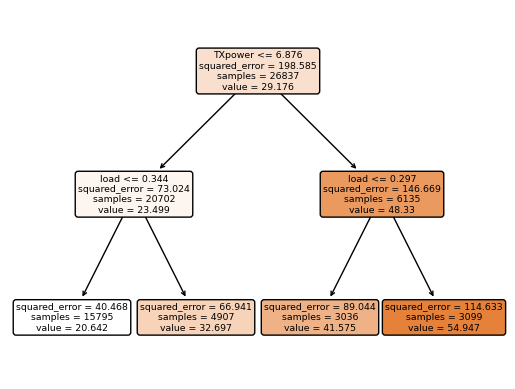

In [57]:
from sklearn.tree import plot_tree
plot_tree(dt, filled=True, feature_names=x.columns, class_names=df.Energy, rounded=True)
plt.show()